# ÜBUNGSBLATT II

# Aufgabe 1

Plotten Sie die Exponentialfunktionen $e^{-t/2}$ und $e^{-2t/5}$ über einem Intervall $0 \leq t \leq 2$ mit einer geeigneten Stützstellenzahl
* a) übereinander in einem Plot,
* b) nebeneinander in verschiedenen Plots und
* c) untereinander in vierschiedenen Plots.

Beschriften Sie die Plots geeignet. Kopieren Sie die Plots über die Zwischenablage in ein Word-Dokument. Speichern Sie einen der Plots als .png und fügen Sie ihn in dasselbe Word-Dokument ein. Welchen Unterschied erkennen Sie?
**Hinweis:** Verwenden Sie den Befehl ``subplot``!

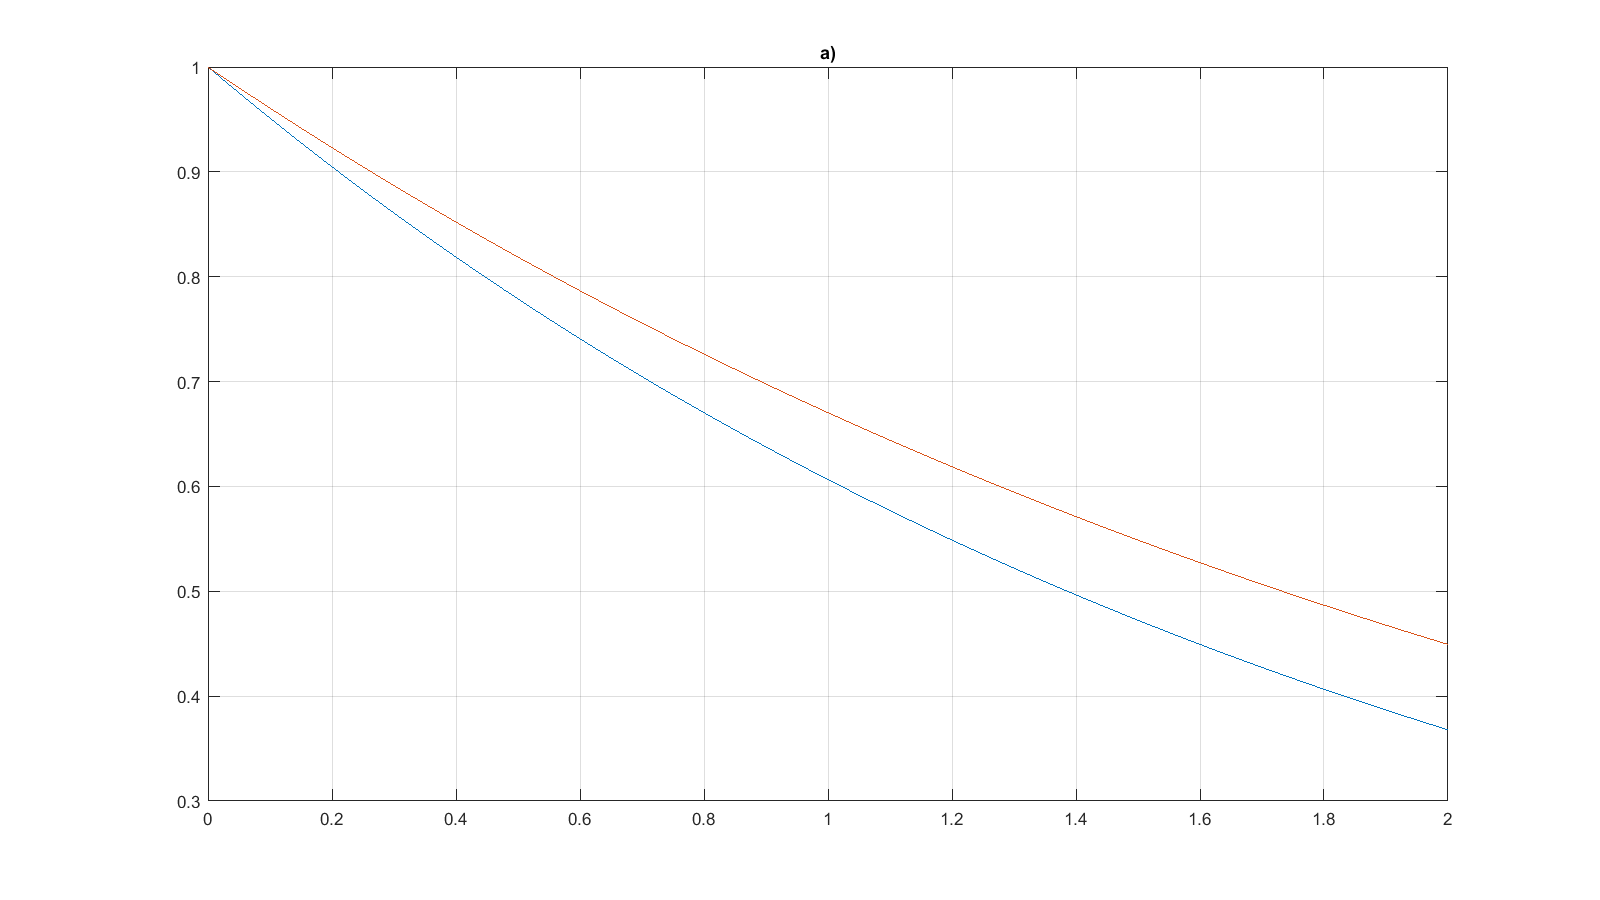

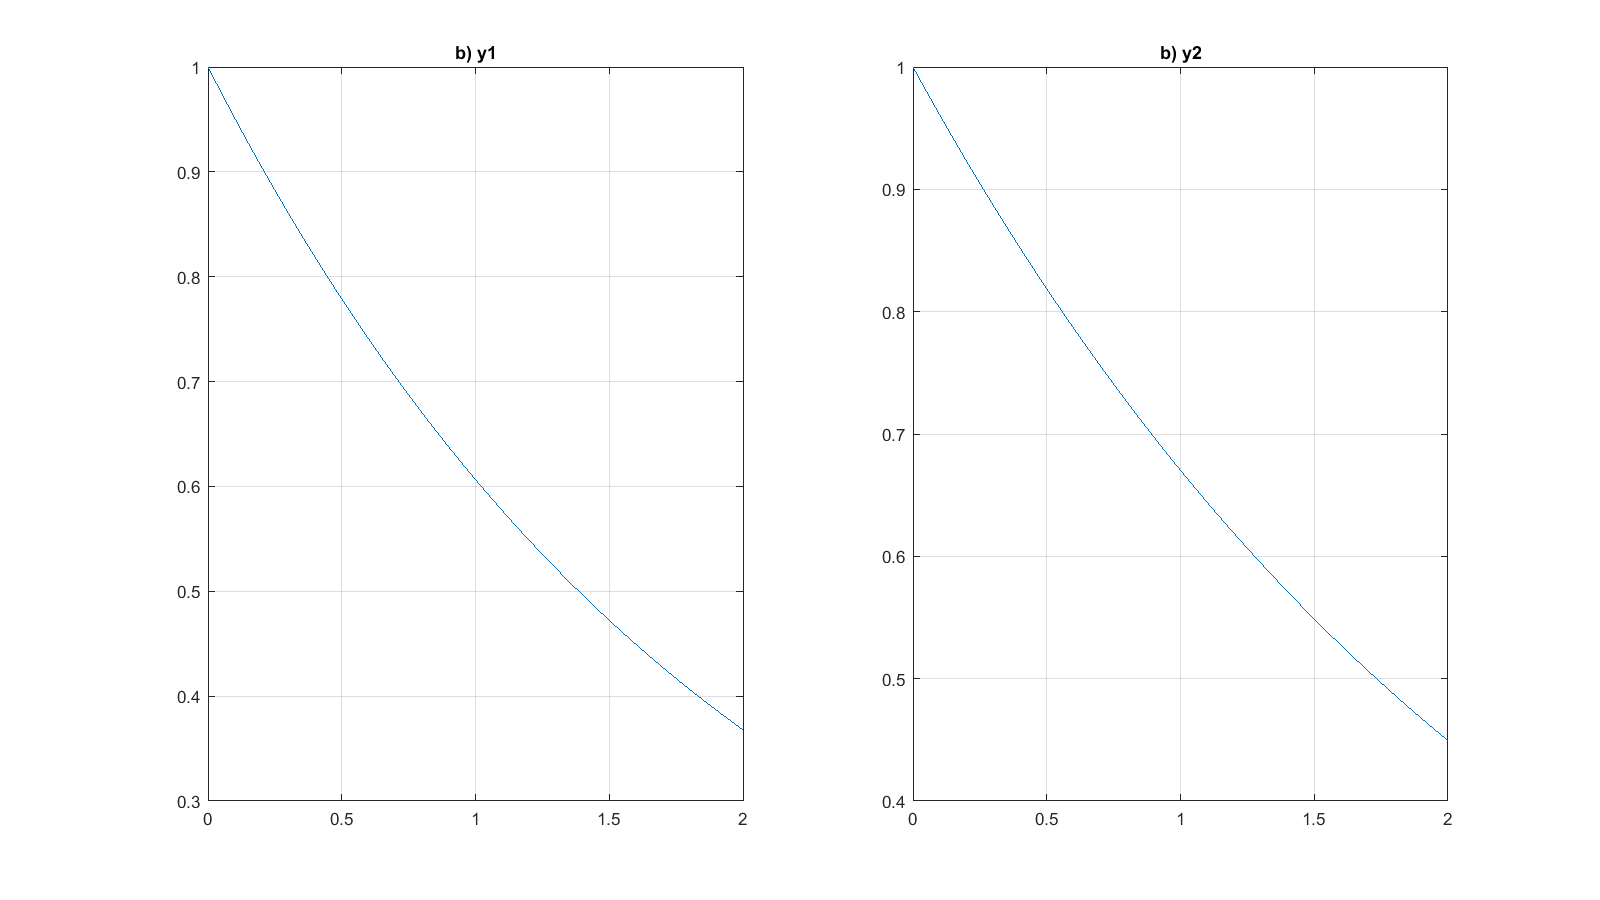

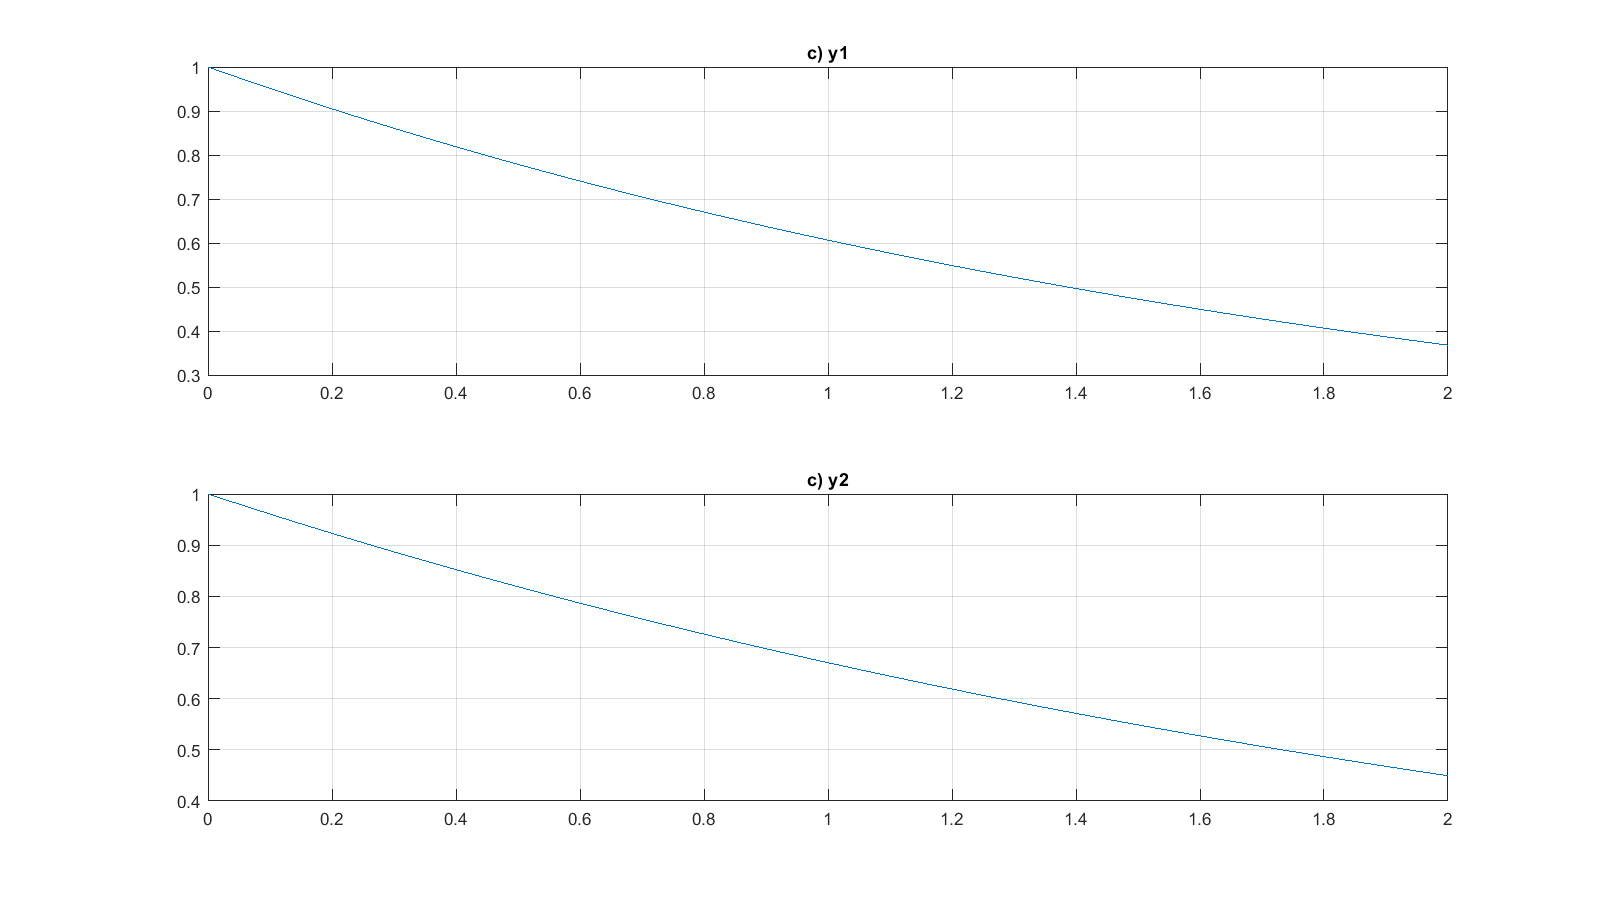

In [1]:
clear all;
clf;
x = linspace(0,2,101);
y1 = exp(-.5*x);
y2 = exp(-.4*x);
res = [0 0 1280 720];

plot(x,y1)
hold on
plot(x,y2)
set(gcf,'Position',res);
title('a)')
grid on
clf;

subplot(1,2,1)
plot(x,y1)
title('b) y1')
grid on
subplot(1,2,2)
plot(x,y2)
set(gcf,'Position',res);
title('b) y2')
grid on
clf;

subplot(2,1,1)
plot(x,y1)
title('c) y1')
grid on
subplot(2,1,2)
plot(x,y2)
set(gcf,'Position',res);
title('c) y2')
grid on
clf;

# Aufgabe 2

Geben Sie die folgende MATLAB-Befehlsfolge ein und interpretieren Sie die (etwas seltsamen) grafischen Darstellungen.

```
t = (0: 0.5: 10);
F1 = sin(2*pi*5*t);
F2 = (t-2).^2;
figure(1)
plot(t, F1)
figure(2)
plot(t, F1, t, F2)
legend('F1', 'F2', 0)
```
**Hinweis:** Experimentieren Sie mit der Zahl der Stützstellen!

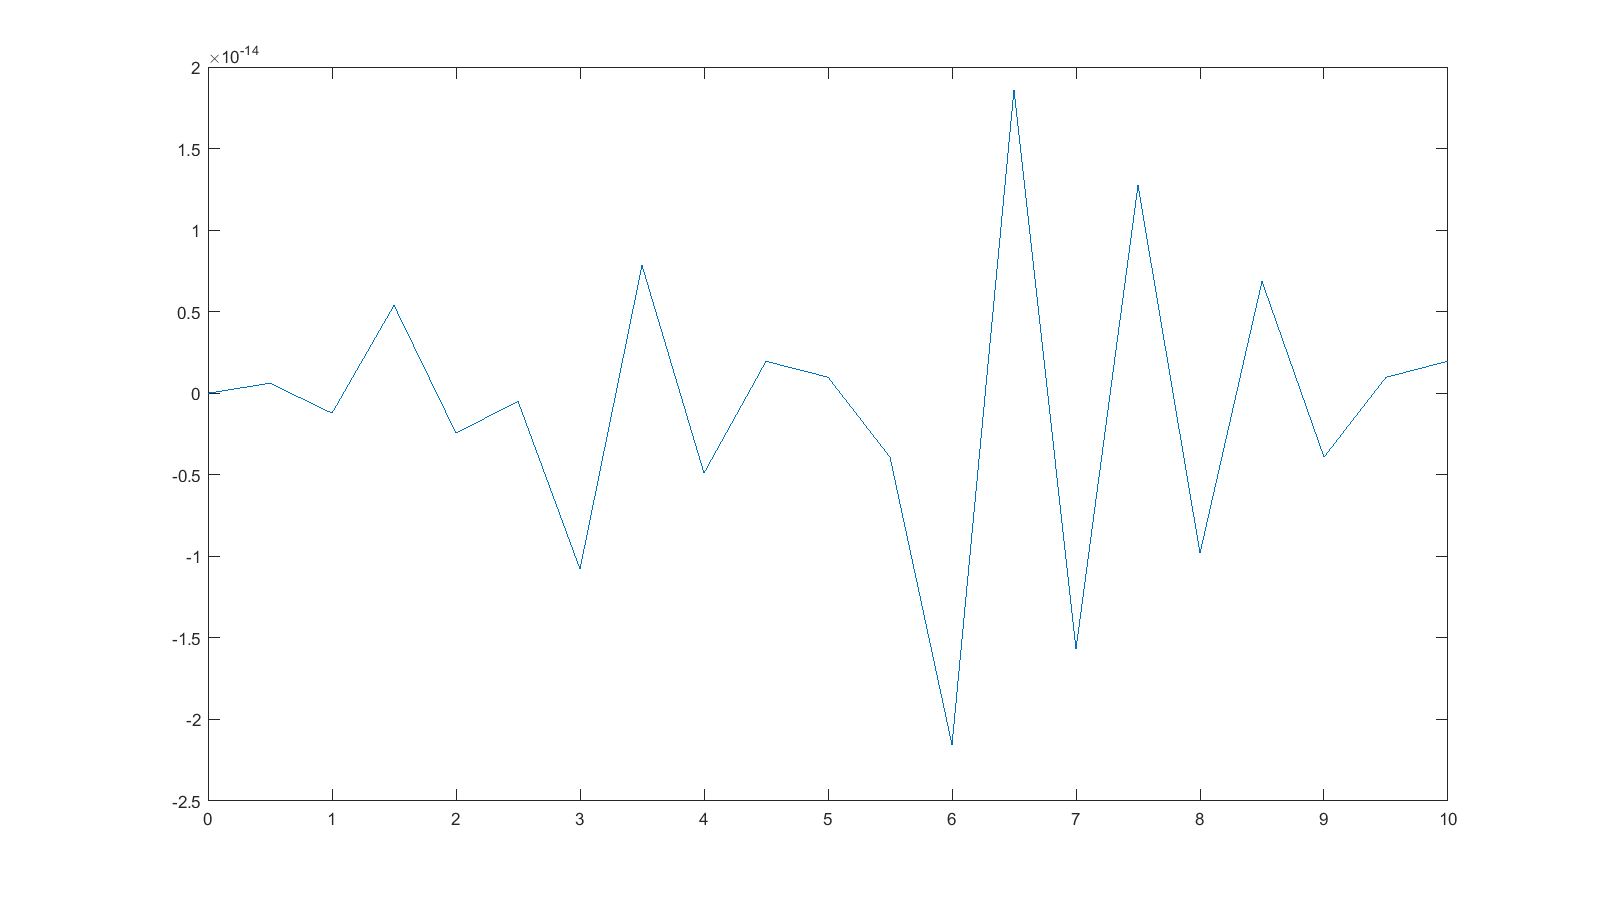

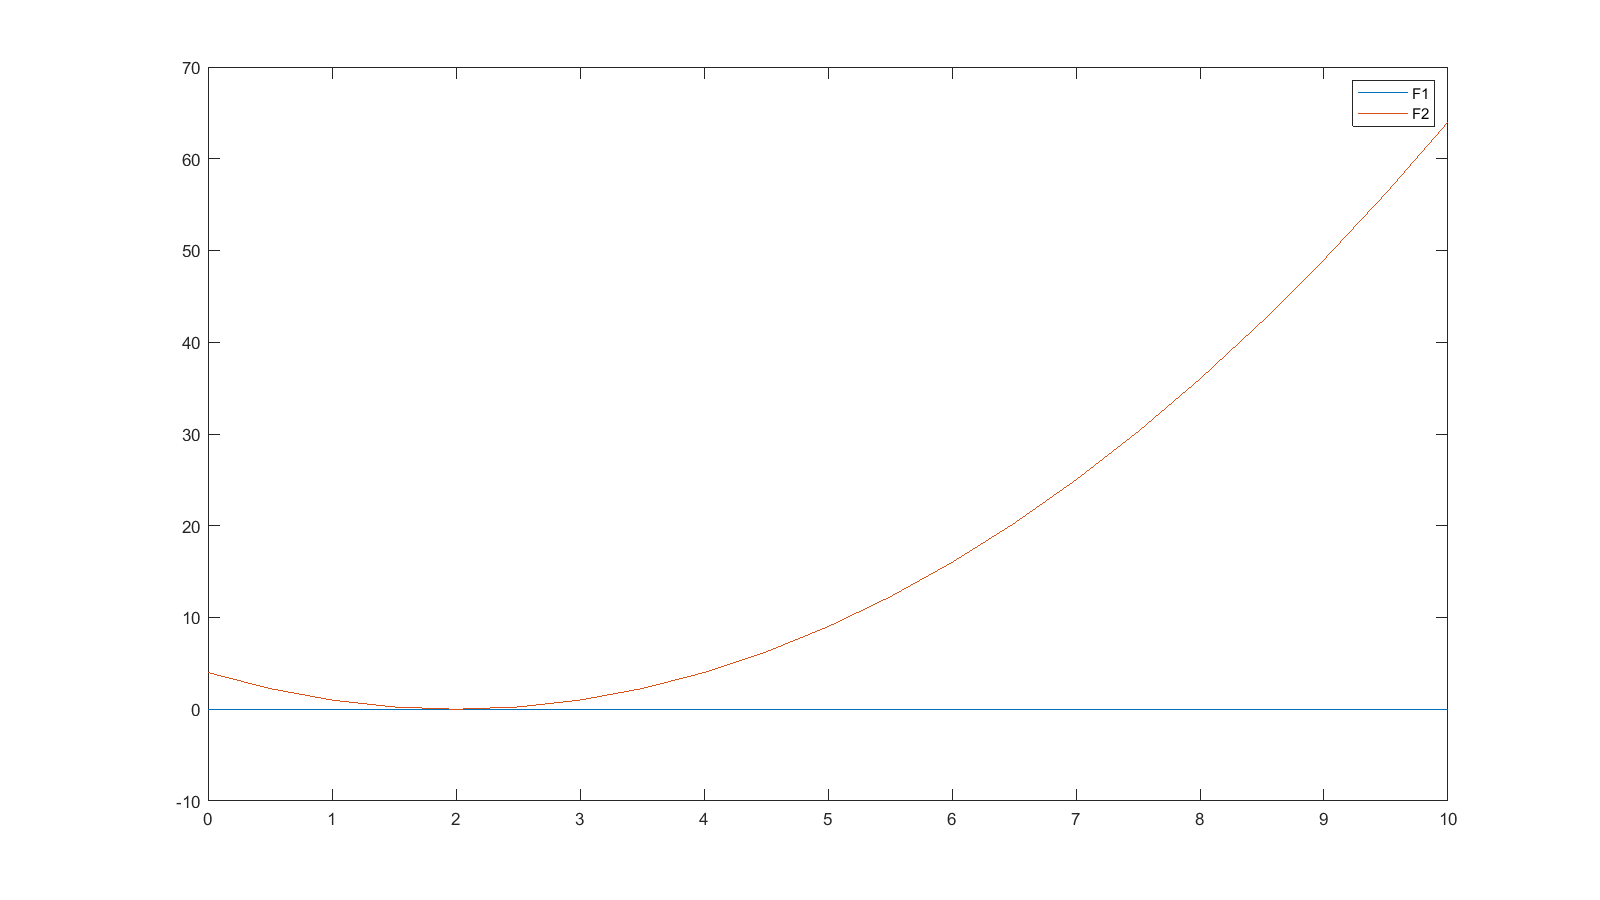

In [2]:
clear all;
clf;
t = (0: 0.5: 10);
F1 = sin(2*pi*5*t);
F2 = (t-2).^2;
figure(1)
plot(t, F1)
figure(2)
plot(t, F1, t, F2)
legend('F1', 'F2')

# Aufgabe 3

Mit dem Befehl ``dA = diff(A)`` wird einem Variablenvektor ``A`` ein Variablenvektor ``dA`` (Name beliebig) zugeordnet, der die Differenzen zwischen den benachbarten Elementen von ``A`` enthält; siehe auch ``help diff``. Damit enthält ``dA`` ein Element weniger als ``A``!

**a)** Geben Sie nach der Bearbeitung von Aufgabe 2 die folgende Befehlsfolge ein:
```
dF2 = diff(F2);
figure(3)
plot(t, dF2)
```
Warum meldet MATLAB einen Fehler und wie lässt sich dieser Fehler beheben?

In [10]:
clear all;
clf;
% Arrays from A2
t = (0: 0.5: 10);
F2 = (t-2).^2;

dF2 = diff(F2); % forward difference method only
figure(3)
plot(t, dF2)

Error using plot
Specify the coordinates as vectors or matrices of the same size, or as a vector and a matrix that share the same length in at least one dimension.

**b)** Schreiben Sie die Befehlsfolge auf, mit der sich numerisch die erste Ableitung (Differenzenquotient) der Funktion ``F2`` aus Aufgabe 2 bestimmen lässt.

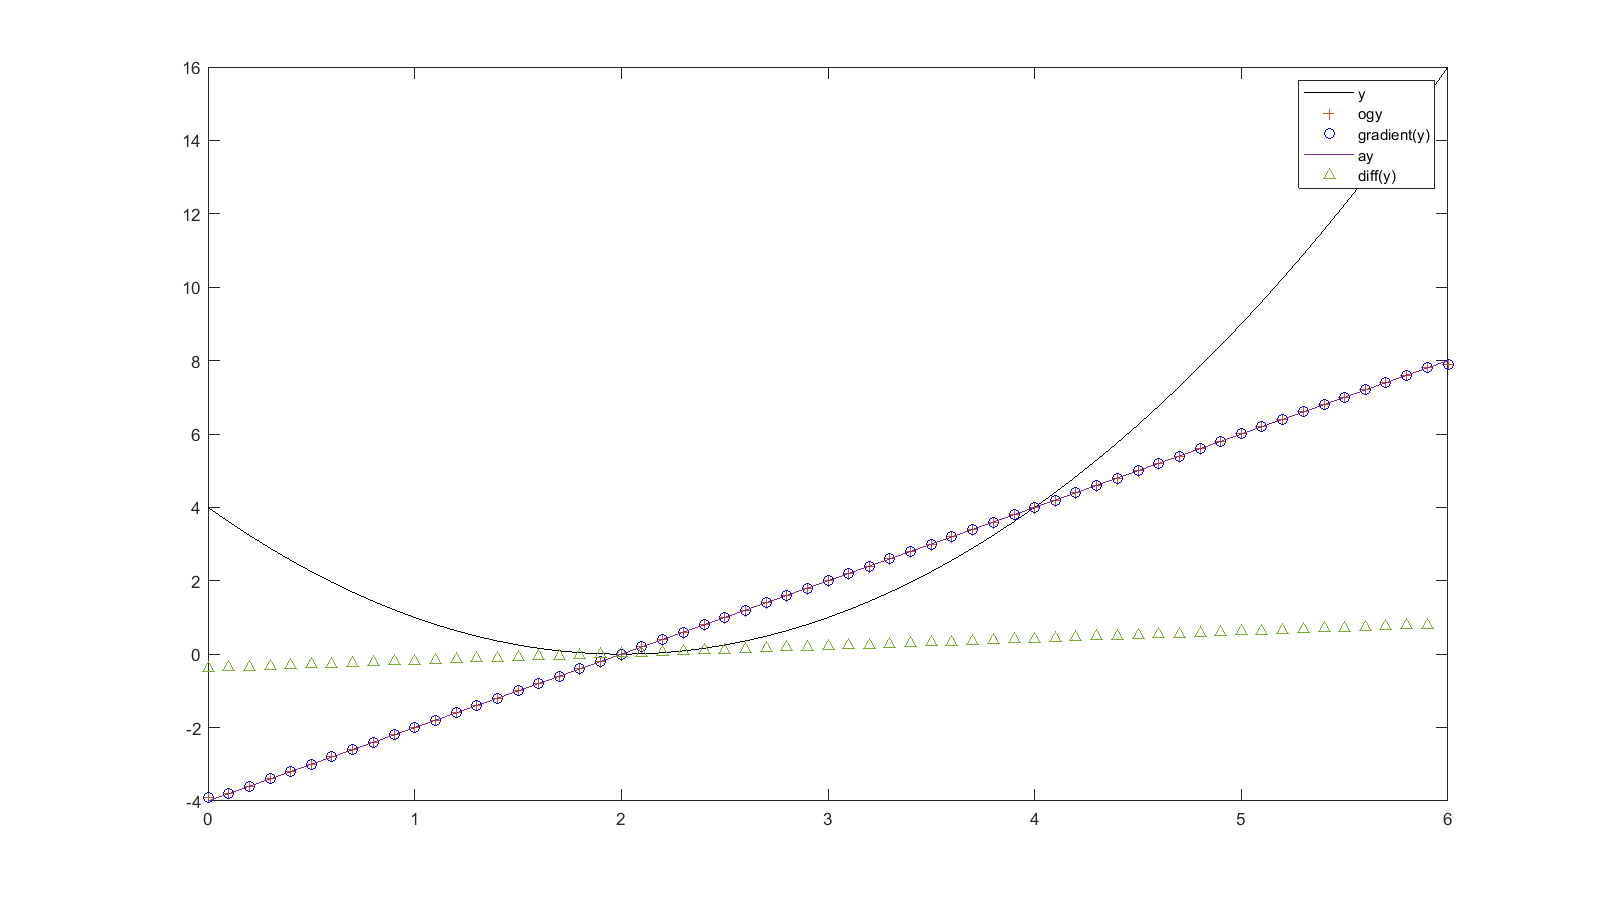

In [70]:
clear all;
clf;

%% ======== Base array creation ===================
t_min = 0;
t_max = 6;
dt = 0.1;
t = t_min:dt:t_max;
y = (t-2).^2;

%% ======== Own implementation of gradient() ======
% gradient() uses forward differences method for the first element,
% backward differences method for the last element and
% midpoint differences for all other elements.
ogy = zeros(1,length(y));

ogy(1) = (y(2)-y(1))/(t(2)-t(1)); % Forward diffs
ogy(end) = (y(end)-y(end-1))/(t(end)-t(end-1)); % Backward diffs

% Midpoint diffs:
% iterate over all elements of 'ogy' but the very first and the very last
for i = 2:length(ogy)-1
    ogy(i) = (y(i+1)-y(i-1))/(t(i+1)-t(i-1));
end
%% ======== Using gradient() ======================
gy = gradient(y,t);

%% ======== Using diff() ==========================
diffy = diff(y);

%% ======== Analytical ============================
ay = 2*(t-2);

%% ================================================
plot(t,y,'black')
hold on
scatter(t,ogy,'+')
hold on
scatter(t,gy,'o','blue')
hold on
plot(t,ay)
hold on
scatter(t(1:end-1),diffy,'^')
legend('y', 'ogy','gradient(y)','ay','diff(y)')
set(gcf,'Position',[0 0 1280 720]);

# Aufgabe 4

Berechnen und plotten Sie die Funktion $x^2 + y^2$ über einem Rechteck $(-2 \leq x \leq 2),\,(-1 \leq y \leq 1)$. Verwenden Sie dabei ein Gitternetz, welches in x-Richtung eine äquidistante Unterteilung der Länge 0.2 und in y-Richtung von 0.1 hat.

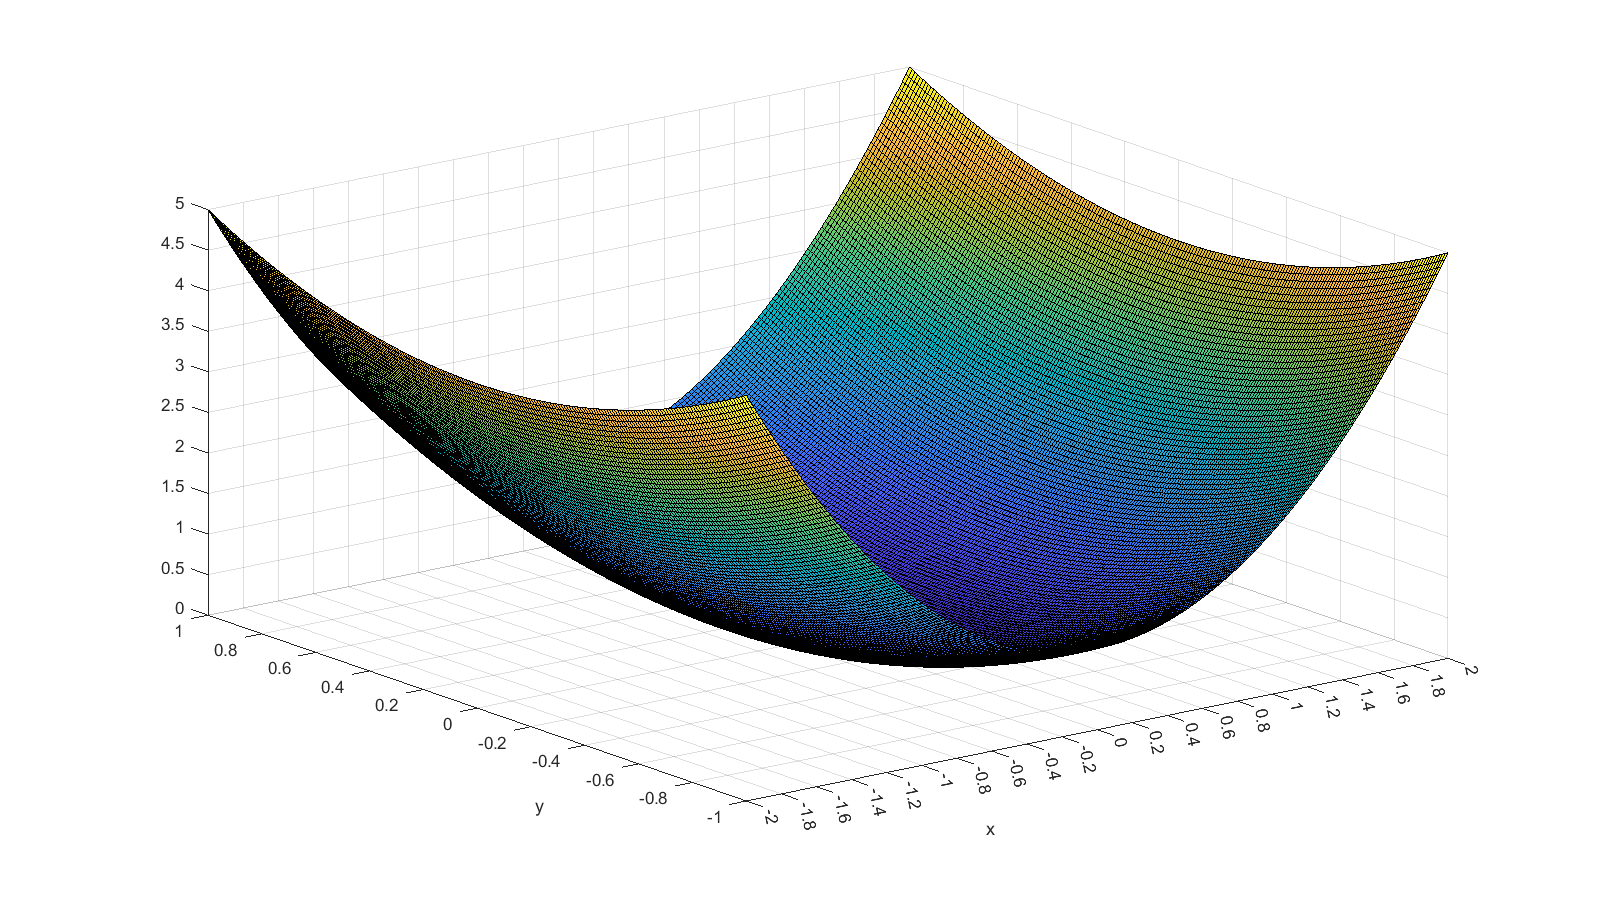

In [5]:
clear all;
clf;

tx = linspace(-2,2,201);
ty = linspace(-1,1,201);

[X,Y] = meshgrid(tx,ty);
Z = X.^2+Y.^2;

surf(X,Y,Z)
set(gcf,'Position',[0 0 1280 720]);
xticks(linspace(-2,2,21))
xlabel('x')
yticks(linspace(-2,2,21))
ylabel('y')
grid on

# Aufgabe 5

Definieren Sie eine MATLAB-Funktion ``kreis`` (als *function-file*), die eine Kreisscheibe für einen vorgebbaren Radius plottet und deren Umfang ``U`` und Fläche ``F`` als Ergebnis ausgibt.
Radius und Füllfarbe der Kreisscheibe sollen als Parameter eingegeben werden. Der Kreismittelpunkt soll der Koordinatenursprung sein. Verwenden Sie zum Zeichnen der Kreisscheibe die MATLAB-Befehle ``fill`` und ``axis equal``, über deren Bedeutung Sie sich im MATLAB-Hilfemenü informieren.

Rufen Sie die *fuction-file* mit ``kreis(radius,farbe)`` im Command-Window auf!

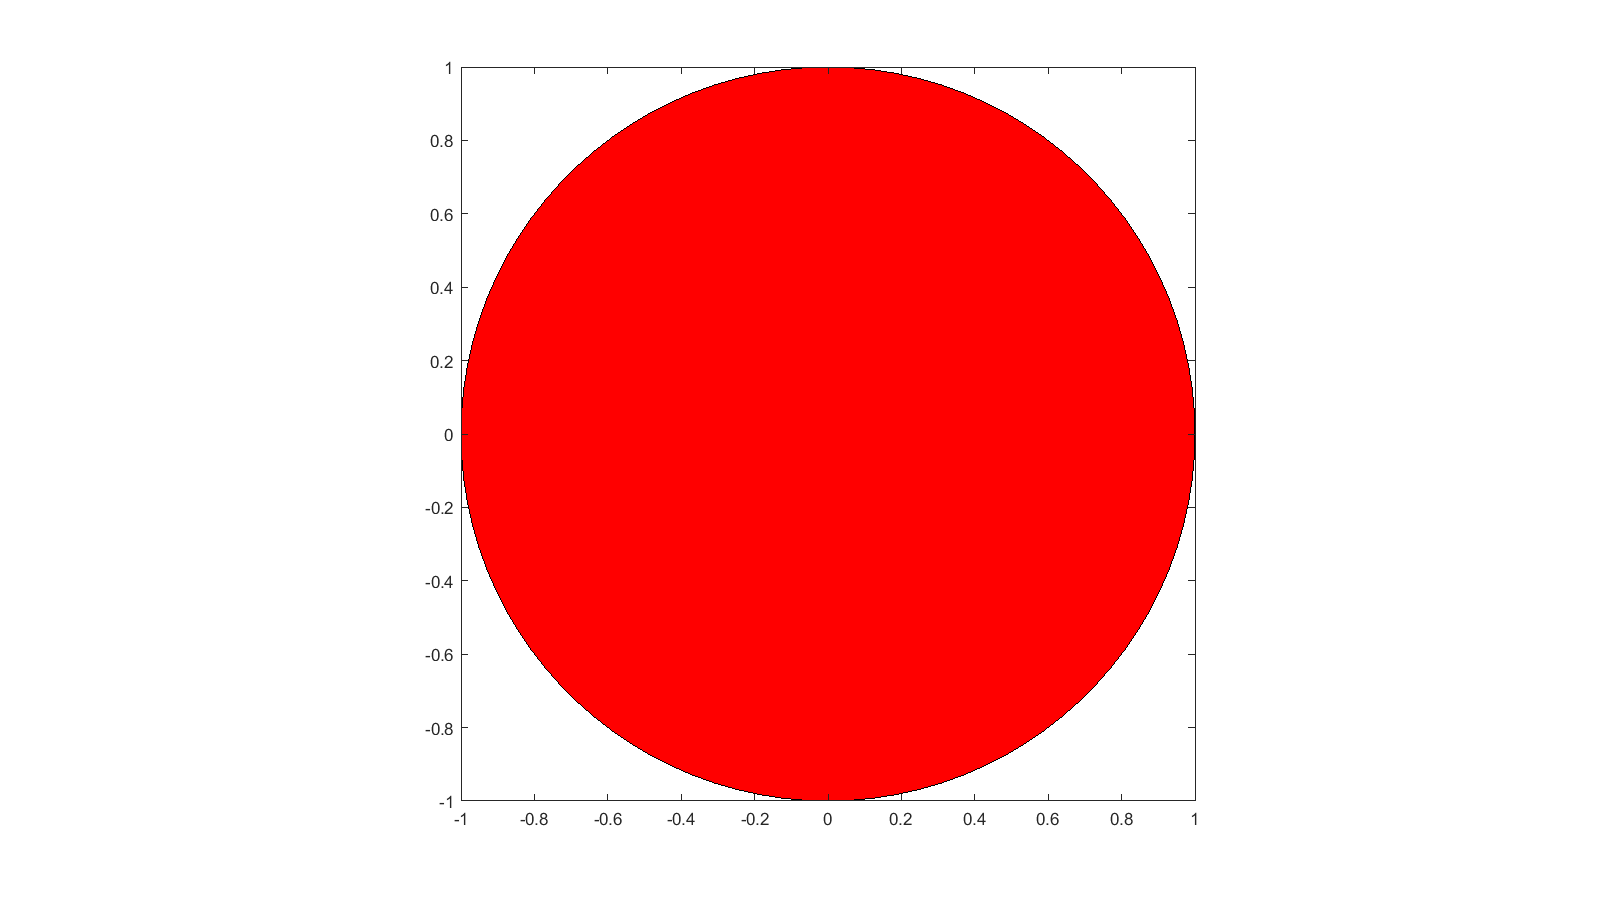

U = 
     6.2832e+000

F = 
     3.1416e+000

In [10]:
clear all;
clf;
clc;

[U F] = kreis(1,'r')

function [U F] = kreis(r,c)
    t = 0:pi/50:2*pi;
    x = r.* cos(t);
    y = r.* sin(t);

    U = 2*pi*r;
    F = pi*r^2;
    
    fill(x,y,c)
    set(gcf,'Position',[0 0 1280 720]);
    axis equal
    axis tight
end